# Modeling Calcium Dynamics for Myoepithelial Cells in Hydra¶

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML
import csv
from imp import reload
from scipy.integrate import odeint
from tqdm import tqdm_notebook, _tqdm_notebook, tnrange
import functions
import plot_results
from functions import *

#### v_serca

In [2]:
(j_ip3r(c0, ct0, h0, ip0) + j_leak(c0, ct0))/(c0**1.75 / (c0**1.75 + k_serca**1.75))

1.44705290611436

#### e_l

In [3]:
v0 - (- j_k(v0, n0) - j_na(v0, m0, hh0) - 2*j_vgcc(v0)) / v_l 

-57.03158532907785

#### v_in

In [4]:
0.05 - j_vgcc(v0)

0.4447377986652488

## Time Stepping

### Single cell

In [2]:
# initial conditions
t = np.linspace(0, T, int(T/dt))
y0 = [c0, ct0, h0, ip0, v0, n0, m0, hh0]

# integrate
sol = odeint(rhs1, y0, t, hmax = 0.005)

c = sol[:, 0]
c_t = sol[:, 1]
h = sol[:, 2]
ip = sol[:, 3]
v = sol[:, 4]
n = sol[:, 5]
m = sol[:, 6]
hh = sol[:, 7]

### 1D multiple cells

In [3]:
# initial conditions
t = np.linspace(0, T, int(T/dt))
y0 = np.array([[c0]*N, [ct0]*N, [h0]*N, [ip0]*N, [v0]*N, \
              [n0]*N, [m0]*N, [hh0]*N])
y0 = np.reshape(y0, 8*N)

# integrate
sol = odeint(rhs2, y0, t, hmax = 0.005) 

In [4]:
c = sol[:, 0:N]
c_t = sol[:, N:2*N]
h = sol[:, 2*N:3*N]
ip = sol[:, 3*N:4*N]
v = sol[:, 4*N:5*N]
n = sol[:, 5*N:6*N]
m = sol[:, 6*N:7*N]
hh = sol[:, 7*N:8*N]

### 2D multiple cells

In [2]:
# initial conditions
t = np.linspace(0, T, int(T/dt))
y0 = np.array([c0*np.ones((N,N)), ct0*np.ones((N,N)), h0*np.ones((N,N)), \
              ip0*np.ones((N,N)), v0*np.ones((N,N)), \
              n0*np.ones((N,N)), m0*np.ones((N,N)), hh0*np.ones((N,N))])
y0 = np.reshape(y0, 8*N*N)

# integrate
sol = odeint(rhs21, y0, t, hmax = 0.005) 

In [3]:
c = np.reshape(sol[:,0:N*N], (-1,N,N))

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ims = []
for j in tnrange(np.int(T/(100*dt))):
    im = plt.imshow(c[j*100], cmap = 'jet', animated = True, vmin=0, vmax=1.4)
    ims.append([im])

ani = anim.ArtistAnimation(fig, ims, interval = 1, blit=False)

plt.show()

In [5]:
ani.save('test.mp4')

KeyboardInterrupt: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
np.where(np.max(c)==c)

(array([201483]), array([0]), array([6]))

## Plot Results

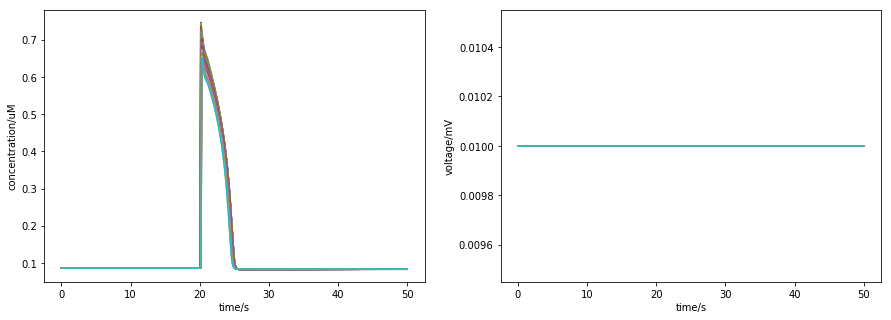

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(121)
# plt.plot(TIME[190000:210000], c[190000:210000], '-', label = 'c(t)')
plt.plot(TIME[0:-1], c, '-', label = 'c(t)')
plt.xlabel('time/s')
plt.ylabel('concentration/uM')
#plt.legend()
# plt.show()

plt.subplot(122)
# plt.plot(TIME[190000:210000], v[190000:210000], label = 'membrane potential')
plt.plot(TIME[0:-1], ip, '-', label = 'ip(t)')
plt.xlabel('time/s')
plt.ylabel('voltage/mV')
#plt.legend()
plt.show()

# HH model

In [12]:
dt = 0.0001
t = np.linspace(0, 5, int(5/dt))
z0 = [v0, n0, m0, hh0]

def hh_rhs(z,t):
    v, n, m, hh = z
    dndt = 1000*(alpha_n(v) * (1 - n) - beta_n(v) * n) * phi

    dmdt = 1000*(alpha_m(v) * (1 - m) - beta_m(v) * m) * phi

    dhhdt = 1000*(alpha_hh(v) * (1 - hh) - beta_hh(v) * hh) * phi
    dvdt = 1000*(10 - j_k(v, n) - j_na(v, m, hh) \
        - j_l(v))
    return [dvdt, dndt, dmdt, dhhdt]

In [13]:
hh_sol = odeint(hh_rhs, z0, t, hmax = 0.005)
v = hh_sol[:, 0]
n = hh_sol[:, 1]
m = hh_sol[:, 2]
hh = hh_sol[:, 3]

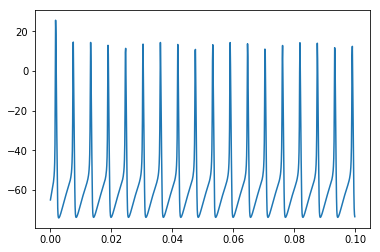

In [16]:
plt.plot(t[0:1000], v[0:1000])